<font color='mediumblue'>
## How to Build Neural Networks <br>
Constructing Neural Networks to solve ML problems is a multiple-stage process. Generally, one can identify the key steps as follows:
* ***step 1:*** Load and process the data
* ***step 2:*** Define the model and its architecture
* ***step 3:*** Choose the optimizer and the cost function
* ***step 4:*** Train the model 
* ***step 5:*** Evaluate the model performance on the *unseen* test data
* ***step 6:*** Modify the hyperparameters to optimize performance for the specific data set *(optional)*

## A real example — recognizing handwritten digits ##
We will build networks that can recognize handwritten numbers. <br>
For achieving this goal, we use MNIST, a database of handwritten digits made up of a training set of 60,000
examples and a test set of 10,000 examples. 
<br>The training examples are annotated by humans
with the correct answer. 
<br>For instance, if the handwritten digit is the number three, then
three is simply the label associated with that example.<br>
Each MNIST image is in gray scale, and it consists of 28 x 28 pixels. A subset of these
numbers is represented in the following diagram:
![Deep%20Learning%20with%20Keras.bmp](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToXD458Zgqs8VLLzbJPImOK6EgAf4OBquibDaUnw344dkcd1kT)

We will build six different neural networks and compare their performance:
* [Case #1: Defining a simple neural net in Keras](#Case-#1:-Defining-a-simple-neural-net-in-Keras)
* [Case #2: Improving the simple net in Keras with hidden layers](#Case-#2:-Improving-the-simple-net-in-Keras-with-hidden-layers)
* [Case #3: Further improving the simple net in Keras with dropout](#Case-#3:-Further-improving-the-simple-net-in-Keras-with-dropout)
* [Case #4: Testing different optimizers in Keras](#Case-#4:-Testing-different-optimizers-in-Keras)
* [Case #5: Adopting regularization for avoiding overfitting](#Case-#5:-Adopting-regularization-for-avoiding-overfitting)
* [Case #6: Optimizing hyperparameters with Keras-scikit-wrapper](#Case-#6:-Optimizing-hyperparameters-with-Keras-scikit-wrapper)

<font color = "#CC3D3D">
## Case #1: Defining a simple neural net in Keras

##### Set Up

In [2]:
# 모델 시각화 및 저장을 위해 관련 패키지를 아래와 같이 설치해야 한다.

!pip install pydot graphviz h5py

In [4]:
!pip install tensorflow

  Stored in directory: C:\Users\709-000\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\709-000\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: C:\Users\709-000\AppData\Local\pip\Cache\wheels\ee\98\38\46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
Successfully built gast termcolor absl-py


tensorboard 1.14.0 has requirement setuptools>=41.0.0, but you'll have setuptools 40.8.0 which is incompatible.


In [6]:
!pip install keras

In [7]:
#
# Setting for obtaining reproducible results
#

import numpy as np
import tensorflow as tf
import random as rn

# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
# See these references for further details:
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/keras-team/keras/issues/2280#issuecomment-306959926

import os
os.environ['PYTHONHASHSEED'] = '0'

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.

np.random.seed(42)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

#rn.seed(12345)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of
# non-reproducible results.

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, 
                              inter_op_parallelism_threads=1)

from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, 
# see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(1234)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

Using TensorFlow backend.


In [8]:
import keras, sklearn
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

### Step 1: Load and Process the Data ###

In [10]:
# mnist 이미지 데이터
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784 # 전체 픽셀 갯수

X_train = X_train.reshape(60000, RESHAPED) # 학습이미지 6만개
X_test = X_test.reshape(10000, RESHAPED) # 평가이미지 만개
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 한 픽셀 값은 0~255로 표현된다. 0은 흰색, 255는 검은색

# normalize
X_train /= 255 
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
# 뉴럴넷은 입력데이터에 대한 스케일 조정이 필요
# to_categorical : 찾을 값이 0~9까지이므로 10개로 원핫 인코딩을 한다.
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

60000 train samples
10000 test samples


### Step 2: Define the Model & its Architecture ###

In [11]:
# 10 outputs
# final stage is softmax
model = Sequential()

# Dense : 입력모드가 784(RESHAPED), 첫번째 히든레이어는 10개로 연결하라
model.add(Dense(10, input_shape=(RESHAPED,))) 
model.add(Activation('softmax'))

model.summary() # 종합한것을 본다.  
# Param 이 weight 이다. 7850개를 학습시키면 된다.

W0702 19:55:08.354771  1812 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 19:55:08.359771  1812 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 19:55:08.367772  1812 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [12]:
from IPython.display import Image
from keras.utils.vis_utils import model_to_dot

Image(model_to_dot(model,show_shapes=True, show_layer_names=False).create(prog='dot', format='png'))

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

### Step 3: Choose the Optimizer and the Cost function

In [13]:
# optimizer : SGD 는 최적의 방법을 찾는 것
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

W0702 19:58:01.213658  1812 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0702 19:58:01.224659  1812 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### Step 4: Train the Model

In [14]:
%%time
# validation_split 0.2 : 80은 학습하고 20%는 평가를 위해 남겨 두겠다
# verbose : 중간 중간의 과정을 찍을 것인지 말것인지, 얼마나 자세하게 정보를 표시할 것인가를 지정. (0, 1, 2)
history = model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, 
                    validation_split=0.2)
# history변수에 저장한 것은 나중에 체크해보기 위함.

W0702 19:58:04.159827  1812 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0702 19:58:04.192829  1812 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 1s 11us/step - loss: 1.3995 - acc: 0.6581 - val_loss: 0.8983 - val_acc: 0.8258
Epoch 2/30
48000/48000 [==============================] - 0s 8us/step - loss: 0.7951 - acc: 0.8276 - val_loss: 0.6579 - val_acc: 0.8565
Epoch 3/30
48000/48000 [==============================] - 0s 8us/step - loss: 0.6440 - acc: 0.8499 - val_loss: 0.5617 - val_acc: 0.8683
Epoch 4/30
48000/48000 [==============================] - 0s 8us/step - loss: 0.5711 - acc: 0.8608 - val_loss: 0.5088 - val_acc: 0.8767
Epoch 5/30
48000/48000 [==============================] - 0s 8us/step - loss: 0.5269 - acc: 0.8675 - val_loss: 0.4746 - val_acc: 0.8818
Epoch 6/30
48000/48000 [==============================] - 0s 8us/step - loss: 0.4964 - acc: 0.8732 - val_loss: 0.4505 - val_acc: 0.8868
Epoch 7/30
48000/48000 [==============================] - 0s 8us/step - loss: 0.4739 - acc: 0.8772 - val_loss: 0.4322 - val_acc: 0.89

In [15]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

NameError: name 'history' is not defined

### Step 5: Evaluate the Model performance

In [16]:
# evaluate : 전체
# 케라스는 pridict 하면 확률을 출력한다.
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 10us/step
Test score: 0.3266168250143528
Test accuracy: 0.9101


##### Save & Load the Model

In [17]:
from keras.models import load_model

In [18]:
model.save('mnist_dnn_01.h5')
%ls

 E 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 24F2-8077

 E:\190527남궁하영\190427\chapter20_Deeplearning 디렉터리

2019-07-02  오후 08:16    <DIR>          .
2019-07-02  오후 08:16    <DIR>          ..
2019-07-02  오후 07:47    <DIR>          .ipynb_checkpoints
2019-06-08  오후 01:50        27,666,600 cats_and_dogs_small_1.h5
2019-06-20  오후 11:06        27,666,600 cats_and_dogs_small_2.h5
2019-07-02  오후 07:47           699,833 chapter20_DeepLearning_CNN.ipynb
2019-07-02  오후 07:59           221,583 chapter20_DeepLearning_dnn_with_keras.ipynb
2019-07-02  오후 06:54    <DIR>          figures
2019-07-02  오후 08:16            80,472 mnist_dnn_01.h5
2019-01-12  오전 09:43         3,494,613 Neural_Networks_with_Keras.pdf
               6개 파일          59,829,701 바이트
               4개 디렉터리  483,461,627,904 바이트 남음


In [19]:
model2 = load_model('mnist_dnn_01.h5')
Image(model_to_dot(model2,show_shapes=True, show_layer_names=False).create(prog='dot', format='png'))

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

<font color = "#CC3D3D"><br>
## Case #2: Improving the simple net in Keras with hidden layers

### Step 2: Define the Model & its Architecture ###

In [20]:
model = Sequential()

# 첫번째 층
model.add(Dense(32, input_shape=(RESHAPED,)))
model.add(Activation('relu')) # 엑티베이션 함수를 relu 함수로 사용

# 두변째 층
model.add(Dense(32, activation='relu')) # 위의 두줄을 한줄로 표현
#model.add(Activation('relu'))

# 세번째 층
model.add(Dense(32))
model.add(Activation('relu'))

# 출력층
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

# 총 weight 수가 27,562개

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total para

In [21]:
Image(model_to_dot(model,show_shapes=True, show_layer_names=False).create(prog='dot', format='png'))

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

### Step 3: Choose the Optimizer and the Cost function

In [22]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=Adam, metrics=['accuracy'])

### Step 4: Train the Model

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 1s 17us/step - loss: 1.1776 - acc: 0.6689 - val_loss: 0.4827 - val_acc: 0.8662
Epoch 2/30
48000/48000 [==============================] - 1s 14us/step - loss: 0.4177 - acc: 0.8799 - val_loss: 0.3343 - val_acc: 0.9057
Epoch 3/30
48000/48000 [==============================] - 1s 14us/step - loss: 0.3358 - acc: 0.9019 - val_loss: 0.2938 - val_acc: 0.9151
Epoch 4/30
48000/48000 [==============================] - 1s 14us/step - loss: 0.2982 - acc: 0.9118 - val_loss: 0.2732 - val_acc: 0.9179
Epoch 5/30
48000/48000 [==============================] - 1s 13us/step - loss: 0.2715 - acc: 0.9201 - val_loss: 0.2476 - val_acc: 0.9278
Epoch 6/30
48000/48000 [==============================] - 1s 14us/step - loss: 0.2503 - acc: 0.9261 - val_loss: 0.2365 - val_acc: 0.9315
Epoch 7/30
48000/48000 [==============================] - 1s 13us/step - loss: 0.2326 - acc: 0.9313 - val_loss: 0.2211 - val_acc

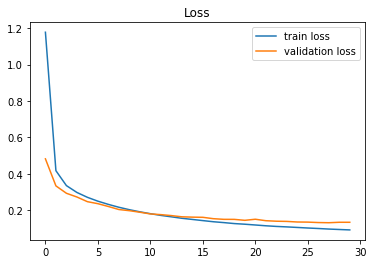

In [23]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=30, verbose=1, 
                    validation_split=0.2)

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

### Step 5: Evaluate the Model performance

In [24]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

model.save('mnist_dnn_02.h5')

10000/10000 [==============================] - 0s 9us/step
Test score: 0.1198722924171947
Test accuracy: 0.9637


<font color = "#CC3D3D"><br>
## Case #3: Further improving the simple net in Keras with dropout

### Step 2: Define the Model & its Architecture ###

In [25]:
from keras.layers.core import Dropout

# Dropout : 층별로 오버피팅을 줄일 수 있도록 지정할 수 있다.
model = Sequential()

model.add(Dense(128, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(0.2)) # Dropout 비율을 20%로 하라

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

W0702 20:16:42.573796  1812 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_6 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
__________

### Step 3: Choose the Optimizer and the Cost function

In [26]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

### Step 4: Train the Model

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 1s 26us/step - loss: 1.6627 - acc: 0.4900 - val_loss: 0.8729 - val_acc: 0.8173
Epoch 2/30
48000/48000 [==============================] - 1s 21us/step - loss: 0.8645 - acc: 0.7406 - val_loss: 0.5139 - val_acc: 0.8750
Epoch 3/30
48000/48000 [==============================] - 1s 22us/step - loss: 0.6495 - acc: 0.8048 - val_loss: 0.4103 - val_acc: 0.8951
Epoch 4/30
48000/48000 [==============================] - 1s 20us/step - loss: 0.5526 - acc: 0.8344 - val_loss: 0.3606 - val_acc: 0.9046
Epoch 5/30
48000/48000 [==============================] - 1s 20us/step - loss: 0.4985 - acc: 0.8516 - val_loss: 0.3303 - val_acc: 0.9094
Epoch 6/30
48000/48000 [==============================] - 1s 20us/step - loss: 0.4628 - acc: 0.8645 - val_loss: 0.3071 - val_acc: 0.9137
Epoch 7/30
48000/48000 [==============================] - 1s 21us/step - loss: 0.4320 - acc: 0.8727 - val_loss: 0.2894 - val_acc

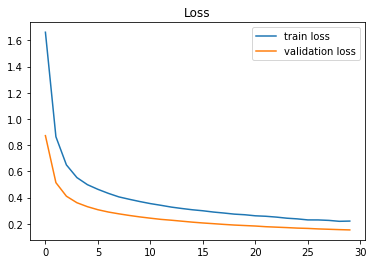

In [27]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, 
                    validation_split=0.2)

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

### Step 5: Evaluate the Model performance

In [28]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

model.save('mnist_dnn_03.h5')

10000/10000 [==============================] - 0s 11us/step
Test score: 0.14984349175542594
Test accuracy: 0.9553


<font color = "#CC3D3D"><br>
## Case #4: Testing different optimizers in Keras 

### Step 2: Define the Model & its Architecture ###

In [29]:
model = Sequential()
model.add(Dense(128, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_9 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
__________

### Step 3: Choose the Optimizer and the Cost function

In [30]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

### Step 4: Train the Model

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 2s 39us/step - loss: 0.4227 - acc: 0.8730 - val_loss: 0.1708 - val_acc: 0.9506
Epoch 2/30
48000/48000 [==============================] - 2s 34us/step - loss: 0.1931 - acc: 0.9433 - val_loss: 0.1180 - val_acc: 0.9647
Epoch 3/30
48000/48000 [==============================] - 2s 35us/step - loss: 0.1442 - acc: 0.9565 - val_loss: 0.1025 - val_acc: 0.9708
Epoch 4/30
48000/48000 [==============================] - 2s 33us/step - loss: 0.1215 - acc: 0.9635 - val_loss: 0.0989 - val_acc: 0.9707
Epoch 5/30
48000/48000 [==============================] - 2s 35us/step - loss: 0.1036 - acc: 0.9688 - val_loss: 0.0881 - val_acc: 0.9724
Epoch 6/30
48000/48000 [==============================] - 2s 33us/step - loss: 0.0935 - acc: 0.9713 - val_loss: 0.0909 - val_acc: 0.9727
Epoch 7/30
48000/48000 [==============================] - 2s 31us/step - loss: 0.0807 - acc: 0.9753 - val_loss: 0.0857 - val_acc

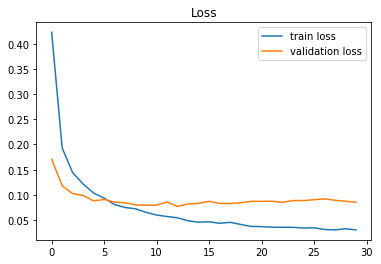

In [31]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=30, verbose=1, 
                    validation_split=0.2)

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

### Step 5: Evaluate the Model performance

In [32]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

model.save('mnist_dnn_04.h5')

10000/10000 [==============================] - 0s 15us/step
Test score: 0.08043208433667896
Test accuracy: 0.981


<font color = "#CC3D3D"><br>
## Case #5: Adopting regularization for avoiding overfitting
<br><img src="https://i.stack.imgur.com/j2F6j.png" width=600 height=400>

### Step 2: Define the Model & its Architecture

In [33]:
# 오버피팅을 줄이는 방법
from keras import regularizers

# Max norm constraints: 
# refer to http://cs231n.github.io/neural-networks-2/#reg
from keras.constraints import max_norm

# Batch normalization layer normalizes the activations of the previous layer at each batch,
# i.e. applies a transformation that maintains the mean activation close to 0 
# and the activation standard deviation close to 1.
from keras.layers import BatchNormalization

model = Sequential()
#model.add(Dense(128, input_shape=(RESHAPED,), kernel_regularizer=regularizers.l2(0.01), kernel_initializer="glorot_normal"))
model.add(Dense(128, input_shape=(RESHAPED,), kernel_constraint=max_norm(2.), kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
#model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01), kernel_initializer="glorot_normal"))
model.add(Dense(64, kernel_constraint=max_norm(2.), kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
activation_12 (Activation)   (None, 64)                0         
__________

### Step 3: Choose the Optimizer and the Cost function

In [34]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

### Step 4: Train the Model

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 2s 46us/step - loss: 0.5049 - acc: 0.8586 - val_loss: 0.1873 - val_acc: 0.9481
Epoch 2/30
48000/48000 [==============================] - 2s 33us/step - loss: 0.2219 - acc: 0.9356 - val_loss: 0.1302 - val_acc: 0.9615
Epoch 3/30
48000/48000 [==============================] - 2s 35us/step - loss: 0.1676 - acc: 0.9495 - val_loss: 0.1141 - val_acc: 0.9646
Epoch 4/30
48000/48000 [==============================] - 2s 35us/step - loss: 0.1416 - acc: 0.9578 - val_loss: 0.0988 - val_acc: 0.9699
Epoch 5/30
48000/48000 [==============================] - 2s 35us/step - loss: 0.1240 - acc: 0.9616 - val_loss: 0.0936 - val_acc: 0.9718
Epoch 6/30
48000/48000 [==============================] - 2s 35us/step - loss: 0.1087 - acc: 0.9663 - val_loss: 0.0828 - val_acc: 0.9738
Epoch 7/30
48000/48000 [==============================] - 2s 35us/step - loss: 0.1008 - acc: 0.9683 - val_loss: 0.0799 - val_acc

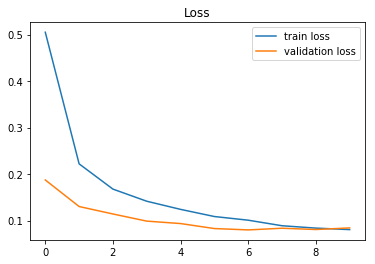

In [35]:
# Early stopping is basically stopping the training once your loss starts to increase.
# 학습 조기 종료를 위해 더 이상 개선의 여지가 없을 때 학습을 종료시키는 콜백함수
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=3)
# patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 
#           줄 것인 가를 지정합니다. 
# 만약 10이라고 지정하면 개선이 없는 에포크가 10번째 지속될 경우 학습을 종료합니다.

history = model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, 
                    validation_split=0.2, callbacks=[early_stop])

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

### Step 5: Evaluate the Model performance

In [36]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

model.save('mnist_dnn_05.h5')

10000/10000 [==============================] - 0s 15us/step
Test score: 0.08075678874645383
Test accuracy: 0.9747


<font color = "#CC3D3D"><br>
## Case #6: Optimizing hyperparameters with Keras-scikit-wrapper

##### 1) Define a function which constructs, compiles and returns a Keras model

In [37]:
def dnn_model(optimizer=Adam(), dropout_rate=0.0):
    # Define the model & its architecture    
    model = Sequential()
    model.add(Dense(128, input_shape=(RESHAPED,), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))
    # Choose the optimizer and the cost function
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # Return model           
    return model

##### 2) Instantiate `KerasClassifier` which implements the Scikit-Learn classifier interface

In [38]:
from keras.wrappers.scikit_learn import KerasClassifier
# call Keras scikit wrapper
dnn = KerasClassifier(build_fn=dnn_model, epochs=1)

##### 3) Apply scikit-learn's `RandomizedSearchCV` (or `GridSearchCV`)

In [39]:
from sklearn.model_selection import RandomizedSearchCV

# Specify parameters and distributions to sample from
param_dist = {
    'dropout_rate': [0.0, 0.2, 0.5], 
    'optimizer': ['rmsprop', 'adam'], 
    'batch_size': [32, 64, 128]
}

# Run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(dnn, param_distributions=param_dist, n_iter=n_iter_search, cv=3)
random_search.fit(X_train, y_train)
print(random_search.score(X_test, y_test))

# Summarize results
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %s" % (mean, stdev, param))

Epoch 1/1
40000/40000 [==============================] - 0s 12us/step
Epoch 1/1
40000/40000 [==============================] - 0s 12us/step
Epoch 1/1
40000/40000 [==============================] - 0s 12us/step
Epoch 1/1
40000/40000 [==============================] - 1s 13us/step
Epoch 1/1
40000/40000 [==============================] - 0s 12us/step
Epoch 1/1
40000/40000 [==============================] - 0s 12us/step
Epoch 1/1
40000/40000 [==============================] - 0s 6us/step
Epoch 1/1
40000/40000 [==============================] - 0s 6us/step
Epoch 1/1
40000/40000 [==============================] - 0s 6us/step
Epoch 1/1
40000/40000 [==============================] - 0s 8us/step
Epoch 1/1
40000/40000 [==============================] - 0s 8us/step
Epoch 1/1
40000/40000 [==============================] - 0s 8us/step
Epoch 1/1
40000/40000 [==============================] - 0s 8us/step
Epoch 1/1
40000/40000 [==============================] - 0s 8us/step
Epoch 1/1
40000/40000 [=====

## End